In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import re

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from tqdm import tqdm
from subprocess import check_output
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.layers import LSTM, GRU
from tensorflow.keras.models import Sequential
%matplotlib inline

# Predicting Resell Value of Sneakers

When you hear about investments, the things that comes up to mind are stocks, VUL, mutual fund, and others. But do you know that you can invest on sneakers (Nike, Adidas, etc)? Last year, this market currently has a value of more than two billion dollars.

To demonstrate, last 2017, Nike, in collaboration with Off-White, released a sneaker that was sold for Php. 8100, and was valued at around 70,000 php on the sneaker market. You would think that this would be a bad thing to buy, but currently, that same sneaker is valued at around Php 250,000. 

First and foremost, this <a href="https://s3.amazonaws.com/stockx-sneaker-analysis/wp-content/uploads/2019/02/StockX-Data-Contest-2019-3.xlsx">data</a> is from StockX, one of the biggest sneaker reselling companies in the world. Last 2019, they had a Data Contest. They picked random datapoints for all US Off-White x Nike and Yeezy sales between 9/1/2017 and 2/13/2019.

In this study, I will predict the resell value of the sneakers using the data that they released.

# Initialization

In [2]:
df3 = pd.read_excel('stockx.xlsx', sheet_name='Raw Data')
df4 = df3.copy()
df4 = df4[['Brand', 'Sneaker Name', 'Sale Price', 'Retail Price', 'Shoe Size',
           'DaysStored']]
df4 = pd.get_dummies(data=df4, columns=['Brand', 'Sneaker Name', 'Shoe Size'])
df5 = df4.copy()


df_feat1 = df4.drop(['Sale Price'], axis=1)
df_targ1 = df4['Sale Price']

features1 = df_feat1.to_numpy()
targets1 = df_targ1.to_numpy()


x, x_test, y, y_test = train_test_split(features1, targets1, test_size=0.1,
                                        train_size=0.9, random_state=1)
x_train, x_cv, y_train, y_cv = train_test_split(x, y,
                                                test_size = 2/9,
                                                train_size = 7/9,
                                                random_state=1)
df4

,Sale Price,Retail Price,DaysStored,Brand_ Yeezy,Brand_Off-White,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove,...,Shoe Size_11.5,Shoe Size_12.0,Shoe Size_12.5,Shoe Size_13.0,Shoe Size_13.5,Shoe Size_14.0,Shoe Size_14.5,Shoe Size_15.0,Shoe Size_16.0,Shoe Size_17.0
0,1097.0,220,342,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,685.0,220,282,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,690.0,220,282,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1075.0,220,282,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,828.0,220,202,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,565.0,220,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99952,598.0,220,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99953,605.0,220,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99954,650.0,220,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


For the data preprocessing, first, `DaysStored` was derived based on the sale date and the shoe release date. Then, categorical features were one hot encoded. Overall, there are 80 features and the target is the `Sale Price`.

Last ML1, Random Forest was the best model for price prediction.

In [3]:
RF = RandomForestRegressor()
RF.fit(x_train, y_train)


RandomForestRegressor()

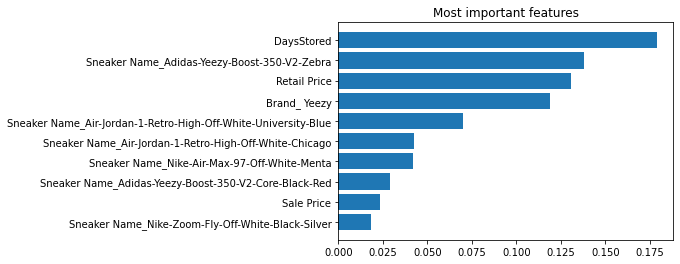

[(0.17924011954622518, 'DaysStored'),
 (0.13822127689659386, 'Sneaker Name_Adidas-Yeezy-Boost-350-V2-Zebra'),
 (0.13100463099226517, 'Retail Price'),
 (0.11895938130096545, 'Brand_ Yeezy'),
 (0.07016502532742096,
  'Sneaker Name_Air-Jordan-1-Retro-High-Off-White-University-Blue'),
 (0.04255547697447202,
  'Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago'),
 (0.04163083200814768, 'Sneaker Name_Nike-Air-Max-97-Off-White-Menta'),
 (0.028723748035317992,
  'Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red'),
 (0.023558565083322273, 'Sale Price'),
 (0.018036211043108846, 'Sneaker Name_Nike-Zoom-Fly-Off-White-Black-Silver')]

In [4]:
feat_impt = []
for x, i in zip(RF.feature_importances_, df4.columns.tolist()):
    feat_impt.append((x, i))
sort_impt = sorted(feat_impt, key=lambda x: x[0])[-10:]

plt.barh([val[1] for val in sort_impt], [val[0] for val in sort_impt],
         align='center')
plt.title('Most important features')
plt.show()
sort_impt[::-1]


Based on the graph, the derived feature was the most important feature for the model. 

In [5]:
df5['sale_pred'] = RF.predict(features1)
df5


,Sale Price,Retail Price,DaysStored,Brand_ Yeezy,Brand_Off-White,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016,Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove,...,Shoe Size_12.0,Shoe Size_12.5,Shoe Size_13.0,Shoe Size_13.5,Shoe Size_14.0,Shoe Size_14.5,Shoe Size_15.0,Shoe Size_16.0,Shoe Size_17.0,sale_pred
0,1097.0,220,342,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1046.610000
1,685.0,220,282,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,695.270000
2,690.0,220,282,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,686.280000
3,1075.0,220,282,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1085.420000
4,828.0,220,202,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,808.960000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99951,565.0,220,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,593.319108
99952,598.0,220,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,593.173794
99953,605.0,220,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,601.244391
99954,650.0,220,49,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,693.716829


<ipython-input-6-d9c47004b4ed>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df5_j11 = df5_j1.groupby(['DaysStored'])['Sale Price', 'sale_pred'].mean()


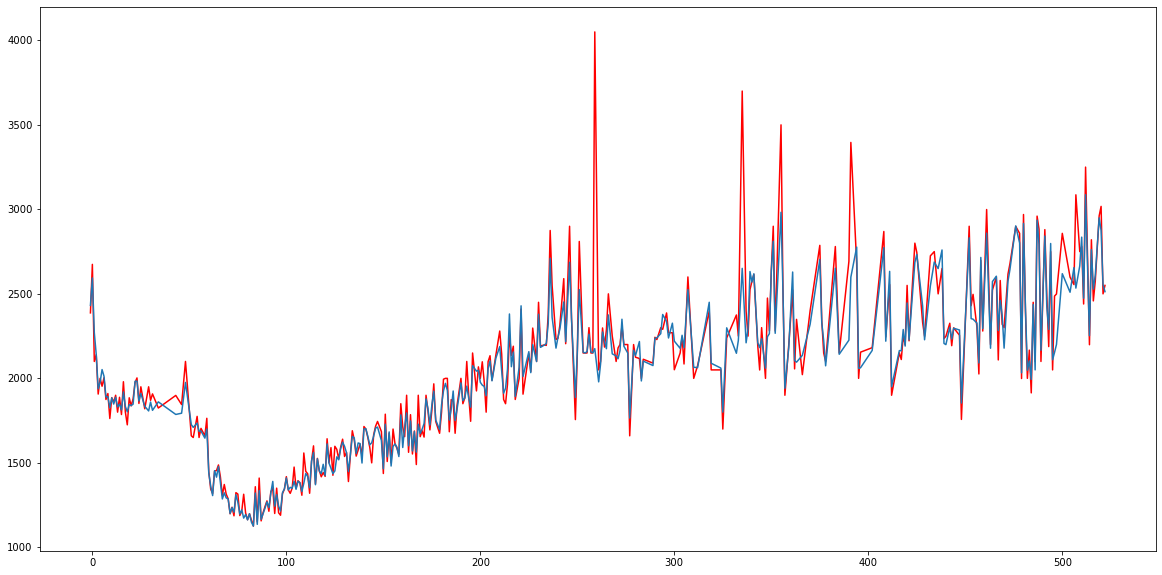

In [6]:
df5_j1 = df5[df5['Sneaker Name_Air-Jordan-1-Retro-High-Off-White-Chicago'] == 1]
df5_j11 = df5_j1.groupby(['DaysStored'])['Sale Price', 'sale_pred'].mean()
plt.figure(figsize=(20,10))
plt.plot(df5_j11.index, df5_j11['Sale Price'], color='red')
plt.plot(df5_j11.index, df5_j11['sale_pred'])


# Accuracy

In [7]:
mean_sq = mean_squared_error(df5['Sale Price'], df5['sale_pred'])
r2 = r2_score(df5['Sale Price'], df5['sale_pred'])
print(f'Mean Squared Error = {mean_sq}')
print(f'R squared = {r2}')

Mean Squared Error = 580.8551176733589
R squared = 0.9911355826827489


R squared was close to one, which implies that the model is accurate.

In [8]:
col_feat = df_feat1.columns.tolist()
for item in range(len(col_feat)):
    print(f'{item}. {col_feat[item]}')

0. Retail Price
1. DaysStored
2. Brand_ Yeezy
3. Brand_Off-White
4. Sneaker Name_Adidas-Yeezy-Boost-350-Low-Moonrock
5. Sneaker Name_Adidas-Yeezy-Boost-350-Low-Oxford-Tan
6. Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2015
7. Sneaker Name_Adidas-Yeezy-Boost-350-Low-Pirate-Black-2016
8. Sneaker Name_Adidas-Yeezy-Boost-350-Low-Turtledove
9. Sneaker Name_Adidas-Yeezy-Boost-350-Low-V2-Beluga
10. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Beluga-2pt0
11. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Blue-Tint
12. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Copper
13. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Green
14. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red
15. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-Red-2017
16. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Core-Black-White
17. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Cream-White
18. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Semi-Frozen-Yellow
19. Sneaker Name_Adidas-Yeezy-Boost-350-V2-Sesame
20. Sneaker Name_Adidas

As you can see below, although the model is accurate, one weakness of it is that it cannot do extrapolation properly.

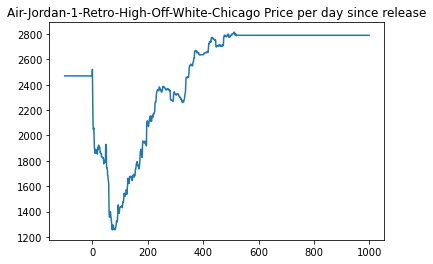

In [9]:
list1 = [0]*80
price = []
brand = 3

shoesize = 65

price = []
list1 = [0]*80
for z in range(-100, 1000):
    list1[0] = 220
    list1[1] = z
    list1[brand] = 1
    list1[21] = 1
    list1[shoesize] = 1
    j1_ow_chi_now = RF.predict(np.array(list1).reshape(1, -1))
    price.append([z, int(j1_ow_chi_now)])
plt.plot([val[0] for val in price], [val[1] for val in price])
shoe_name = re.findall(r'Sneaker Name_(.+)', col_feat[21])[0]
size = re.findall(r'Shoe Size_(.+)', col_feat[shoesize])[0]
plt.title(f'{shoe_name} Price per day since release')
plt.show()

In [10]:
df = {'DaysStored':[val[0] for val in price], 'sale_pred':[val[1] for val in price]}
df = pd.DataFrame.from_dict(df)
df.to_excel('j1offwhitechi_sz9.xlsx')

The predicted prices of the Random Forest model, excluding the extrapolated values, were used. This is what I'll use to train the LSTM and GRU models

In [11]:
df_jow = pd.read_excel('j1offwhitechi_sz9.xlsx')
df_jow = df_jow.drop('Unnamed: 0', axis=1)[100:622]
df_jow.head()

,DaysStored,sale_pred
100,0,2521
101,1,2285
102,2,2128
103,3,2048
104,4,2048


After loading the excel file, `MinMaxScaler` was used to scale the values from 0 to 1. This is done to minimize the computational complexity when I run the algorithm. Also, the dataset was sliced at a ratio of 80:20, where the first 80% corresponds to the first 80% of the dataset, which will be used for training, while the last 20% will be used as a test set. 

In [12]:
from sklearn.preprocessing import MinMaxScaler
prices = df_jow.sale_pred.values.astype('float32')
prices = prices.reshape(522, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
prices = scaler.fit_transform(prices)
prices.shape

(522, 1)

In [13]:
train_size = int(len(prices) * 0.80)
test_size = len(prices) - train_size
train, test = prices[0:train_size, :], prices[train_size:len(prices), :]
print(len(train), len(test))

417 105


Lookback for 7days was created by grouping every values to 7days, with the 8th day as a target. 

In [14]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i: (i + look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [16]:
train[0:5, 0]

array([0.8124599 , 0.66088635, 0.5600514 , 0.5086705 , 0.5086705 ],
      dtype=float32)

In [144]:
look_back = 7
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [145]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))


A three-layered LSTM model is built below. And the training data (80%) will be used to train the model. 

In [146]:
model = Sequential()

model.add(LSTM(units=50, input_dim=7, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [147]:
model.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_19 (LSTM)               (None, None, 50)          11600     
_________________________________________________________________
dropout_33 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_20 (LSTM)               (None, None, 50)          20200     
_________________________________________________________________
dropout_34 (Dropout)         (None, None, 50)          0         
_________________________________________________________________
lstm_21 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_35 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)               

In [148]:
model.fit(x = trainX, y = trainY, batch_size = 32, epochs = 100)


Epoch 1/100
13/13 [==============================] - 3s 13ms/step - loss: 0.3238
Epoch 2/100
13/13 [==============================] - 0s 12ms/step - loss: 0.2380
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 0.1234
Epoch 4/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0223
Epoch 5/100
13/13 [==============================] - 0s 13ms/step - loss: 0.0173
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0169
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0124
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0116
Epoch 9/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0095
Epoch 10/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0102
Epoch 11/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0088
Epoch 12/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0096
Epoch 13/100
13/13 [=====

In [149]:
prediction = model.predict(testX)
prediction = scaler.inverse_transform(np.array(prediction).reshape(-1, 1))
actual = scaler.inverse_transform(np.array(testY).reshape(-1, 1))


In [150]:
prediction = [x[0] for x in prediction.tolist()]
actual = [x[0] for x in actual.tolist()]

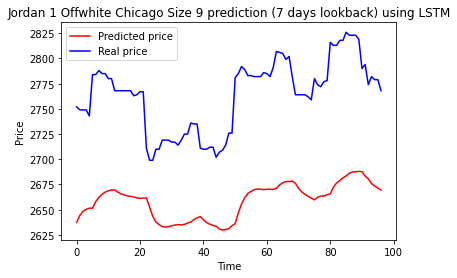

In [151]:
plt.plot(prediction, color = 'red', label = 'Predicted price')
plt.plot(actual, color = 'blue', label = 'Real price')
plt.title('Jordan 1 Offwhite Chicago Size 9 prediction (7 days lookback) using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

A three layered GRU model is also built to compare with the LSTM model. And the model will be trained using the training data that was used to train the previous LSTM model.

In [152]:
model1 = Sequential()

model1.add(GRU(units=50, input_dim=7, return_sequences=True))
model1.add(Dropout(0.2))

model1.add(GRU(units=50, return_sequences = True))
model1.add(Dropout(rate = 0.2))

model1.add(GRU(units=50, return_sequences=False))
model1.add(Dropout(rate=0.2))

model1.add(Dense(1))

model1.compile(optimizer='adam', loss='mean_squared_error')

In [153]:
model1.fit(x = trainX, y = trainY, batch_size = 32, epochs = 100)


Epoch 1/100
13/13 [==============================] - 4s 12ms/step - loss: 0.2469
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0325
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0210
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0156
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0137
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0107
Epoch 8/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0104
Epoch 9/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 10/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0076
Epoch 11/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0073
Epoch 12/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0074
Epoch 13/100
13/13 [=====

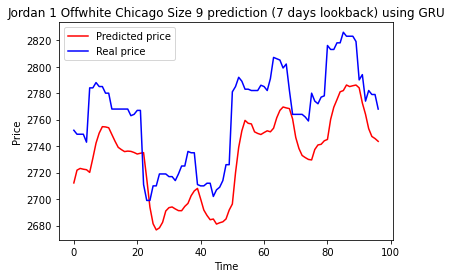

In [154]:
prediction7 = model1.predict(testX)
prediction7 = scaler.inverse_transform(np.array(prediction7).reshape(-1, 1))
actual7 = scaler.inverse_transform(np.array(testY).reshape(-1, 1))
prediction7 = [x[0] for x in prediction7.tolist()]
actual7 = [x[0] for x in actual7.tolist()]
plt.plot(prediction7, color = 'red', label = 'Predicted price')
plt.plot(actual7, color = 'blue', label = 'Real price')
plt.title('Jordan 1 Offwhite Chicago Size 9 prediction (7 days lookback) using GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [155]:
mean_absolute_error(actual7, prediction7)

31.84776951111469

In [156]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(actual, prediction)

104.71165482039304

For the next steps, the principle is the same, except that instead of a seven day lookback, 30day lookback was used instead. 

In [157]:
look_back = 30
trainX30, trainY30 = create_dataset(train, look_back)
testX30, testY30 = create_dataset(test, look_back)

In [158]:
trainX30 = np.reshape(trainX30, (trainX30.shape[0], 1, trainX30.shape[1]))
testX30 = np.reshape(testX30, (testX30.shape[0], 1, testX30.shape[1]))

In [159]:
model = Sequential()

model.add(LSTM(units=50, input_dim=30, return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences = True))
model.add(Dropout(rate = 0.2))

model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(rate=0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [160]:
model1 = Sequential()

model1.add(GRU(units=50, input_dim=30, return_sequences=True))
model1.add(Dropout(0.2))

model1.add(GRU(units=50, return_sequences = True))
model1.add(Dropout(rate = 0.2))

model1.add(GRU(units=50, return_sequences=False))
model1.add(Dropout(rate=0.2))

model1.add(Dense(1))

model1.compile(optimizer='adam', loss='mean_squared_error')

In [161]:
model.fit(x = trainX30, y = trainY30, batch_size = 32, epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 13ms/step - loss: 0.3245
Epoch 2/100
13/13 [==============================] - 0s 12ms/step - loss: 0.2181
Epoch 3/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0296
Epoch 4/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0150
Epoch 5/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0174
Epoch 6/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0137
Epoch 7/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0126
Epoch 8/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0129
Epoch 9/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0138
Epoch 10/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0113
Epoch 11/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0104
Epoch 12/100
13/13 [==============================] - 0s 12ms/step - loss: 0.0124
Epoch 13/100
13/13 [=====

In [162]:
model1.fit(x = trainX30, y = trainY30, batch_size = 32, epochs = 100)

Epoch 1/100
13/13 [==============================] - 3s 11ms/step - loss: 0.2030
Epoch 2/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0420
Epoch 3/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0188
Epoch 4/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0170
Epoch 5/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0125
Epoch 6/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0155
Epoch 7/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0142
Epoch 8/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0137
Epoch 9/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0124
Epoch 10/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0113
Epoch 11/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0104
Epoch 12/100
13/13 [==============================] - 0s 11ms/step - loss: 0.0100
Epoch 13/100
13/13 [=====

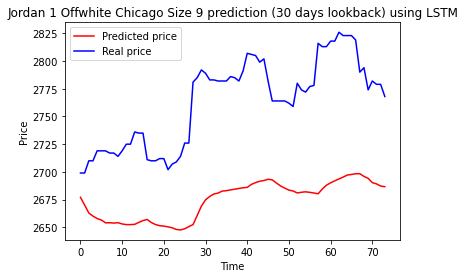

In [170]:
prediction30 = model.predict(testX30)
prediction30 = scaler.inverse_transform(np.array(prediction30).reshape(-1, 1))
actual30 = scaler.inverse_transform(np.array(testY30).reshape(-1, 1))
prediction30 = [x[0] for x in prediction30.tolist()]
actual30 = [x[0] for x in actual30.tolist()]

plt.plot(prediction30, color = 'red', label = 'Predicted price')
plt.plot(actual30, color = 'blue', label = 'Real price')
plt.title('Jordan 1 Offwhite Chicago Size 9 prediction (30 days lookback) using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

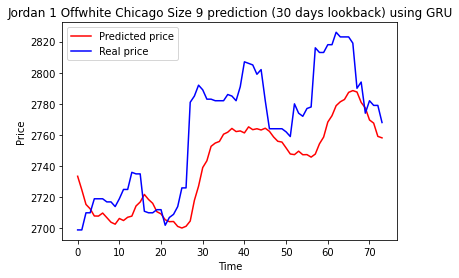

In [171]:
prediction301 = model1.predict(testX30)
prediction301 = scaler.inverse_transform(np.array(prediction301).reshape(-1, 1))
actual301 = scaler.inverse_transform(np.array(testY30).reshape(-1, 1))
prediction301 = [x[0] for x in prediction301.tolist()]
actual301 = [x[0] for x in actual301.tolist()]

plt.plot(prediction301, color = 'red', label = 'Predicted price')
plt.plot(actual301, color = 'blue', label = 'Real price')
plt.title('Jordan 1 Offwhite Chicago Size 9 prediction (30 days lookback) using GRU')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [167]:
mean_absolute_error(actual30, prediction30)

88.42623983847129

In [168]:
mean_absolute_error(actual301, prediction301)

24.36672561233108